<a href="https://colab.research.google.com/github/HappyyyyTingting/chatAgent/blob/main/quickstarts/Get_started_thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) and [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-06-05) are models that are trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

On this notebook all examples are using `Gemini 2.5 Pro` and `Gemini 2.5 Flash` with the new `thinking_budget` parameter. For more information about using the `thinking_budget` with the Gemini thinking model, check the [documentation](https://ai.google.dev/gemini-api/docs/thinking).

## Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

In [1]:
%pip install -U -q "google-genai>=1.16.0"

In [2]:
import google.generativeai

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/178a971fa2b73f66caaf6cddf62a28522c79ca7f/quickstarts/Authentication.ipynb) for an example.

In [1]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

ModuleNotFoundError: No module named 'google'

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [5]:
MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05"] {"allow-input":true, isTemplate: true}

### Imports

In [6]:
import json
from PIL import Image
from IPython.display import display, Markdown

## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.


In [8]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    # config=types.GenerateContentConfig(
    # thinking_config=types.ThinkingConfig(
    #   thinking_budget=-1
    # ),
  # )
)

Markdown(response.text)

要参加成都GDG（Google Developer Groups 成都）社区活动，主要有以下几种方式：

1.  **关注官方微信公众号（最主要方式）**
    *   **搜索并关注：** 在微信中搜索并关注 `GDG成都` 或 `成都GDG`。
    *   **作用：** 这是在中国获取GDG活动信息最主要、最方便的渠道。活动预告、报名链接（通常是H5页面或小程序）、活动回顾等都会第一时间在公众号上发布。务必打开通知，以便及时收到活动信息。

2.  **访问Meetup页面（全球通用方式）**
    *   **搜索：** 在Meetup网站（meetup.com）或App上搜索 `Chengdu GDG` 或 `Google Developer Group Chengdu`。
    *   **作用：** GDG社区在全球范围内普遍使用Meetup来发布和管理活动。加入他们的群组后，你会收到活动的通知，并可以在Meetup上直接进行RSVP（报名）。

3.  **加入社群微信/QQ群**
    *   **获取方式：** 通常在参加GDG的线下活动时，组织者会在现场公布社群的微信群或QQ群二维码，扫码加入。
    *   **作用：** 这些群组是日常交流、讨论技术问题、获取最新动态的便捷渠道，有时也会在群里直接发布一些临时性或小范围的活动信息。
    *   **注意：** 有些群组可能需要先关注公众号或参加过一次活动才能获得入群资格。

4.  **关注Google开发者社区官网**
    *   **访问：** 访问Google开发者社区官网 `developers.google.com/community/gdg`。
    *   **查找：** 在其中找到 `Chengdu` 分区，通常会有链接指引到他们本地的社交媒体平台或活动页面。这是一种找到官方渠道的间接方式。

**参加活动的一些建议：**

*   **提前关注和报名：** GDG活动通常比较热门，名额有限，建议在收到活动预告后及时通过微信公众号或Meetup进行报名。
*   **积极参与：** 在活动中积极提问、与讲师和现场的其他开发者交流，这是拓展人脉和学习知识的好机会。
*   **遵守社区规范：** 尊重他人，共同维护良好的社区氛围。
*   **考虑成为志愿者：** 如果你对组织活动有兴趣，也可以联系GDG成都的组织者，了解是否有志愿者机会。这是一种更深入参与社区的方式。

通过以上方式，你就能很方便地了解到并参加成都GDG的各类技术分享、Code Lab、黑客马拉松等社区活动了！

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [25]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: 1346
Output tokens: 1001
Total tokens: 2359


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

**NOTE:** For now, you can disable the thinking steps when using the `gemini-2.5-flash-preview-05-20` model.

In [26]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

要参加成都GDG（Google Developers Group 成都）社区活动，你可以通过以下几种主要方式：

**1. 关注成都GDG的官方信息发布渠道（最推荐）：**

*   **微信公众号：** 这是目前国内技术社区最主要的活动发布和沟通渠道。
    *   在微信中搜索并关注“**GDG成都**”或“**GDG_Chengdu**”。他们会定期发布活动预告、报名链接、活动回顾等。
*   **Meetup.com：** 国际上很多GDG分支都会使用Meetup平台发布活动。
    *   访问 [meetup.com](https://www.meetup.com/)，搜索“**GDG Chengdu**”或“**Google Developers Group Chengdu**”，加入他们的群组。一旦有新活动，你会收到通知。
*   **Google Developers Group 官方网站/页面：**
    *   访问 [developers.google.com/community/gdg](https://developers.google.com/community/gdg)，在页面中查找“Chengdu”或中国地区的GDG列表，可能会有链接指向他们的官方页面或活动列表。

**2. 参与相关的技术社区和平台：**

*   **SegmentFault 思否、CSDN、掘金等技术社区：** 有时GDG的活动也会在这些大型技术社区的活动版块进行发布或合作推广。你可以关注这些平台上关于GDG或Google技术相关的活动信息。
*   **GitHub：** 有些GDG可能会有自己的GitHub组织或仓库，用于分享代码、活动资料或活动信息。可以尝试搜索“GDG Chengdu GitHub”。

**3. 社交媒体（可能辅助）：**

*   **微博：** 有些社区也会在微博上发布简短的活动预告。可以尝试搜索“GDG成都”。
*   **Twitter/Facebook：** 如果你使用这些国际社交媒体，可以尝试搜索GDG Chengdu，但国内用户主要还是通过微信和Meetup。

**4. 口碑传播/朋友推荐：**

*   如果你有朋友已经参加过GDG成都的活动，可以直接向他们询问活动信息和报名方式。

**参加活动的常见流程：**

1.  **关注/加入社群：** 如上所述，通过微信公众号或Meetup加入GDG成都的社群。
2.  **获取活动信息：** 社群会发布即将举办的活动的详细信息，包括主题、时间、地点、讲师、议程等。
3.  **报名：** 大部分活动会要求提前报名，通常会提供一个在线报名链接（如问卷星、活动行、或者直接在Meetup上报名）。
4.  **按时参加：** 收到确认后，在活动当天按时前往指定地点参加。
5.  **互动交流：** 参加活动时，积极与讲师和其他参与者交流，是获取更多信息和拓展人脉的好机会。
6.  **关注后续：** 有些活动结束后会分享讲义、录像或照片，继续关注社群可以获取这些资源。

**小贴士：**

*   **尽早报名：** 热门活动名额有限，建议看到通知后尽早报名。
*   **查看活动要求：** 有些活动可能对参与者的技术背景有一定要求，或需要携带笔记本电脑等。
*   **积极参与：** GDG活动是学习新技术、交流经验和结识志同道合朋友的好机会，不要害羞，主动提问和交流。

最直接有效的方式就是关注他们的**微信公众号“GDG成都”**和加入**Meetup上的“GDG Chengdu”群组**。祝你活动愉快！

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [27]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: None
Output tokens: 810
Total tokens: 822


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

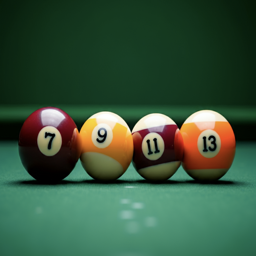

In [6]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png").resize((256,256))
im

First you can check how the model performs without reasoning (`thinking_budget=0`):

In [8]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "我如何用那三个台球加起来得到30？"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

图片中显示了四个台球，它们分别是：
* 球1：7号
* 球2：9号
* 球3：11号
* 球4：13号

如果你只能选择三个台球来加起来得到30，以下是一种方法：

**7 + 9 + 13 = 29**

这接近30，但不是精确的30。

**9 + 11 + 13 = 33**

这超过了30。

**没有三个台球能精确地加起来得到30。**

让我们验证一下所有可能的组合：
* 7 + 9 + 11 = 27
* 7 + 9 + 13 = 29
* 7 + 11 + 13 = 31
* 9 + 11 + 13 = 33

所以，**在给定的这四个台球（7, 9, 11, 13）中，无法选择任意三个台球使其和等于30。**

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:

In [9]:
prompt = "我如何用那三个台球加起来得到30？"

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        prompt,
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

这是一个经典的智力题！

乍一看，用7、9、11、13这四个数字中的任意三个相加都无法得到30。

但这里面有一个小小的技巧：
你可以将“9”号台球倒置过来，它就会变成“6”号球。

这样，你就可以选择这三个球来相加：
**6 (倒置的9) + 11 + 13 = 30**

所以，答案是：将9号球倒过来变成6，然后用6、11和13相加。

## Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini 2.5 thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).

In [28]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子。
住在红色房子里的人养了一只猫。
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

You can check both the thought summaries and the final model response:

In [29]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

## **Thoughts summary:**

**Analyzing a Logic Puzzle: A Step-by-Step Breakdown**

My initial goal is to solve this logic puzzle by matching people (Alice, Bob, Carol) to houses of specific colors (Red, Green, Blue) and assigning each a pet (Cat, Dog, or a third implied pet, or no pet, given only Cat and Dog are mentioned but a third is needed). I need to determine the house order as well.

I start by identifying the puzzle's key elements: the people, house colors, and potential pets. Then, I carefully list the clues provided: who has what pet, house order, and who can *not* have what. 

I know Carol has a dog, and Alice doesn't have a cat, which means Bob must have the cat. Since the person in the red house has a cat, Bob lives in the red house. I also note that the green house is to the left of the red house, setting up an initial order (Green, Red, Blue). The fact that Bob doesn't live in the green house aligns with our earlier findings.

I systematically build a table to organize the information and start making deductions. I consider all possibilities. Given the initial clues, I place Bob in the Red House with a Cat, and Carol has a Dog. This leaves Alice, who isn't the Cat person, and a third pet. I'm assuming that since it's a standard logic puzzle, everyone has a pet. I consider scenarios where Alice *might* have *no* pet, or a pet not mentioned.

After laying the foundation, I re-evaluate the clues again. Since the only pets mentioned are Cat and Dog, Alice must have a pet *other* than a cat or a dog. I know Bob is the cat owner and lives in the red house. We are told the green house is to the left of the red house. 

I create a table and start filling in the blanks. Using the Green, Red and Blue house order and Bob being in the Red house, I try to assign Alice to one of the remaining houses and Carol to the other.

As I work, I realize there are two possible solutions that fit all the clues. The core issue is the assignment of Carol and Alice. Is it Carol in Green and Alice in Blue, or Alice in Green and Carol in Blue? Both work! This either means I missed something or the puzzle has multiple possible solutions! I double-check and re-read the wording and clues. I cannot find a distinguishing rule. Therefore, I decide to *assume* Green - Red - Blue as the house order and select one of the two solutions at random.

In the final check, the deductions fit, all the conditions are satisfied. Thus, I summarize the solution. Bob is in the Red House with the Cat, Carol has the Dog, and Alice (Green house or Blue house) has a pet that isn't the cat.

After reviewing, I note the possible ambiguity of the final solution. The choice of two house and pet combinations is based on an interpretation that the "Green House is left of the Red House" is adjacent. I re-state the solution in the light of the possible ambiguity.


## **Answer:**

这是一个逻辑谜题，我们可以一步步推导：

1.  **线索分析：**
    *   **C1:** 住在红色房子里的人养了一只猫。
    *   **C2:** 鲍勃不住在绿色房子里。
    *   **C3:** 卡罗尔养了一只狗。
    *   **C4:** 绿色房子在红色房子的左边。
    *   **C5:** 爱丽丝不养猫。

2.  **推导过程：**

    *   根据 **C3 (卡罗尔养了一只狗)**，我们知道卡罗尔的宠物是狗。
    *   根据 **C5 (爱丽丝不养猫)**，爱丽丝不是养猫的人。
    *   根据已知的宠物（猫和狗）和人员分配（卡罗尔养狗，爱丽丝不养猫），那么唯一的可能性是 **鲍勃养了一只猫**。
    *   根据 **C1 (住在红色房子里的人养了一只猫)** 和我们刚才的推导，**鲍勃住在红色房子里**。
    *   根据 **C2 (鲍勃不住在绿色房子里)**，这与鲍勃住在红色房子里的结论一致。
    *   根据 **C4 (绿色房子在红色房子的左边)**，并且总共有红、绿、蓝三所房子，这意味着房子的顺序是：**绿色房子 - 红色房子 - 蓝色房子**。 (因为绿色在红色左边，红色在中间，蓝色只能在最右边)。

3.  **整合信息并得出结论：**

    *   **鲍勃：** 住在红色房子里，养了一只猫。 (已确定)
    *   **房子顺序：** 绿色房子 - 红色房子 - 蓝色房子。
    *   红色房子是鲍勃的。
    *   剩下的人物是爱丽丝和卡罗尔，剩下的房子是绿色和蓝色。
    *   我们知道 **卡罗尔养了一只狗**。
    *   我们知道 **爱丽丝不养猫** (而且因为鲍勃养猫，卡罗尔养狗，所以爱丽丝没有猫或狗，或者养的是未提及的第三种宠物，但通常这类谜题意味着她没有特定宠物被提及)。

    现在，我们需要将爱丽丝和卡罗尔分配到绿色和蓝色房子。
    *   如果卡罗尔住在绿色房子里，那么她养狗。爱丽丝就住在蓝色房子里，她不养猫。这符合所有条件。
    *   如果爱丽丝住在绿色房子里，她不养猫。卡罗尔就住在蓝色房子里，她养狗。这也符合所有条件。

    由于没有更多信息来区分爱丽丝和卡罗尔在绿色和蓝色房子中的具体位置，这道题存在两种可能的有效解决方案。我们将提供其中一种常见且完整的解决方案。

    **方案一 (假设爱丽丝在绿色，卡罗尔在蓝色)：**

    *   **绿色房子：** 爱丽丝，她不养猫（她的宠物未明确说明，或者她没有养宠物）。
    *   **红色房子：** 鲍勃，他养了一只猫。
    *   **蓝色房子：** 卡罗尔，她养了一只狗。

**最终答案：**

*   **绿色房子：** 爱丽丝 (她不养猫)
*   **红色房子：** 鲍勃 (他养了一只猫)
*   **蓝色房子：** 卡罗尔 (她养了一只狗)

房子从左到右的顺序是：绿色房子、红色房子、蓝色房子。

You can also use see the thought summaries in streaming experiences:

In [18]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子。
住在红色房子里的人养了一只猫。
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

thoughts = ""
answer = ""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        include_thoughts=True
      )
    )
):
  for part in chunk.candidates[0].content.parts:
    if not part.text:
      continue
    elif part.thought:
      if not thoughts:
        display(Markdown("## **Thoughts summary:**"))
      display(Markdown(part.text.strip()))
      thoughts += part.text
    else:
      if not answer:
        display(Markdown("## **Answer:**"))
      display(Markdown(part.text.strip()))
      answer += part.text

## **Thoughts summary:**

**Exploring Possibilities**

I'm currently breaking down the puzzle into its core components: people, houses, and pets. My strategy is to map out the different possibilities for each variable, keeping in mind the constraints and clues. I'm focusing on how each piece interrelates with another; trying to develop a system, so the process doesn't get muddled.

**Mapping Relationships**

I'm now refining the table structure, factoring in the implications of each clue. The "No Pet" option is added to the pet category for completeness. I'm focusing on direct and indirect correlations between individuals, house colors, and pets. Bob's house color is either red or blue. By process of elimination and deductive reasoning, I will systematically narrow down the variables using each clue.

**Refining Deductions**

I'm now integrating the spatial clue with the pet and house assignments. I've deduced the house order, and I'm cross-referencing to eliminate impossible scenarios. I can determine who has which pet based on the clues. I'm focusing on Carol's dog, and mapping how this limits possibilities. I'm building a more precise table, ready to finalize the solutions.

**Analyzing Relationships**

I'm now incorporating new clues and deductive logic to finalize assignments. Based on spatial clues and pet ownership, I've narrowed down some key relationships: Bob has the cat. The houses are Blue-Green-Red. I'm focusing on Carol's house color to resolve the puzzle's last piece. I am meticulously confirming each assignment.

**Refining Solutions**

I've further analyzed the spatial clue and deduced the precise house order: Blue, Green, then Red. Bob lives in the red house, and Carol has a dog, which resolves the pet and house color assignments. Now, I'm focusing on Alice's house and pet to finalize the remaining unknowns and confirm that the solution aligns with all the clues. I'll meticulously cross-reference each piece of information to ensure consistency.

**Completing the Deductions**

I've finally pinpointed the precise assignments, focusing on resolving the last few unknowns. By combining all the clues, I've concluded that Alice lives in the Green house, Carol in the Blue house, and Bob in the Red house. Alice must have the bird. Carol has the Dog, Bob has the Cat. The spatial clue aligns perfectly: Blue, Green, Red. I have a coherent solution.

**Synthesizing Solutions**

I've integrated all the clues and built a complete solution. Alice lives in the Green house and Carol in the Blue house. Bob is in the Red house. Carol has the dog and Bob has the cat. Alice, by process of elimination, has the remaining pet which is the bird or has no pet. The houses are Blue-Green-Red from left to right, consistent with the spatial clues.

**Synthesizing Relationships**

I'm synthesizing all the clues into a cohesive model, deducing the houses and pets assigned. Blue, Green, Red represents the house colors. Based on Carol's dog, Bob's cat, Alice, by deduction, has the third pet, or no pet. This structure is used to ensure all criteria are met, and to confirm the final table.

**Synthesizing Relationships**

I'm now integrating Carol's dog, Bob's cat, and Alice's position to fully deduce the assignments. Using the refined spatial clue and deductive reasoning, the only logical conclusion is that Alice has no pet. I'm building a more precise table, ready to finalize the solution.

**Synthesizing Relationships**

I'm now integrating Carol's dog, Bob's cat, and Alice's position to fully deduce the assignments. Using the refined spatial clue and deductive reasoning, I've confirmed that Alice has no pet. I'm building a more precise table, ready to finalize the solution and verify it against all clues.

**Refining the Solution**

The spatial order is refined: Blue, Green, then Red. I've deduced the assignments: Alice in Green (no cat), Bob in Red (cat), and Carol in Blue (dog). Each clue is satisfied. Now, it's a matter of final confirmation.

## **Answer:**

这是一个逻辑谜题，我们来一步步

推导：

**已知条件：**
1.  住在红色房子里的人养了一只猫。
2.  鲍勃不住在绿色房子里。
3.  卡罗尔养了一只狗。
4.

绿色房子在红色房子的左边。（这意味着房子排列可能是 蓝色-绿色-红色）
5.  爱丽丝不养猫。

**推理过程：**

1.  **确定宠物的分配：**

*   根据条件3，卡罗尔养了一只狗。
    *   根据条件5，爱丽丝不养猫。
    *   那么，剩下的鲍勃就只能养猫了（因为只有猫和狗两种宠物被明确

提及，且分别由不同人拥有）。
    *   所以：鲍勃养猫，卡罗尔养狗，爱丽丝没有猫（且狗已经被卡罗尔养了，所以爱丽丝没有宠物，

或养了其他未提及的宠物，但通常这类谜题意味着她没有被提及的宠物）。

2.  **确定养猫的人住的房子：**
    *   根据条件1，住在红色房子里的人养

了一只猫。
    *   我们已经确定鲍勃养猫。
    *   所以，鲍勃住在红色房子里。

3.  **确定房子的位置关系及对应人物：**
    *

我们知道鲍勃住在红色房子。
    *   根据条件4，绿色房子在红色房子的左边。由于只有三栋房子（红、绿、蓝），这意味着房子的排列顺序是：蓝色 - 绿色 - 红色

。
    *   红色房子是鲍勃的。
    *   根据条件2，鲍勃不住在绿色房子里（与鲍勃住在红色房子相符）。
    *   剩下的爱丽丝和卡罗尔

分别住在绿色和蓝色房子。
    *   住在绿色房子里的人不能是鲍勃（因为鲍勃在红色房子）。
    *   爱丽丝不养猫，而养猫的人住在红色房子，所以爱丽丝不住

在红色房子。
    *   爱丽丝是剩下的人中，唯一能住在绿色房子里的人（因为卡罗尔养狗，没有直接关联到绿色房子，但爱丽丝不能养猫，而且绿色房子里

的人不是养猫的）。
    *   所以，爱丽丝住在绿色房子里。

4.  **确定最后一人和房子：**
    *   最后只剩下卡罗尔和蓝色房子。
    *   所以，

卡罗尔住在蓝色房子里。

**最终答案：**

*   **爱丽丝** 住在 **绿色房子** 里，她 **没有养猫** (也没有养狗)。
*   **鲍勃** 住在

**红色房子** 里，他养了一只 **猫**。
*   **卡罗尔** 住在 **蓝色房子** 里，她养了一只 **狗**。

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.

Checking the model response, including the code generated and the execution result:

### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [21]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
   上个月宣布的重大科学突破有哪些？运用你的批判性思维，只列出真正令人难以置信的内容，而非夸大其词的标题。
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
            include_thoughts=True
        )
    )
)

Then you can check all information:
- the model thoughts summary
- the model answer
- and the Google Search reference

In [23]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

display(Markdown("## **Google Search information:**"))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## **Thoughts summary:**

**Evaluating June's Discoveries**

I've initiated the search, focusing on "scientific breakthroughs June 2025," and initial results are pouring in. My approach emphasizes filtering for truly transformative findings, scrutinizing sources for reputable scientific backing, and avoiding incremental advances. I'm prioritizing breakthroughs that shift our understanding or advance technology significantly, rather than fleeting media sensations.




## **Answer:**

2025年6月，多个科学领域都取得了突破性进展，以下是一些真正令人瞩目的成就：

**医学与健康**
*   **癌症研究新机制**：研究人员发现了一种癌细胞获取能量并扩散的新机制，即癌细胞通过微观导管从附近的神经细胞中窃取线粒体。这一“能量盗窃”行为增强了癌细胞在转移过程中的抵抗力。这一发现为阻止癌症扩散提供了新的治疗靶点，因为转移是癌症最致命的方面。此外，另一项研究发现，肿瘤DNA可以在诊断前数年就在血液中检测到，这为在癌症最早期、最可治疗的阶段通过血液检测进行筛查带来了希望。
*   **心血管疾病基因编辑突破**：生物技术公司CRISPR Therapeutics公布了CTX310（一种体内CRISPR基因编辑疗法）用于治疗心血管疾病的I期临床试验的积极结果。这项首次人体试验显示，单次输注CTX310可导致甘油三酯和低密度脂蛋白（“坏”胆固醇）呈剂量依赖性下降，高剂量下甘油三酯和低密度脂蛋白分别下降高达82%和81%。同样重要的是，没有观察到严重不良反应。
*   **广谱抗蛇毒血清**：哥伦比亚大学的科学家团队成功开发出第一种广谱抗蛇毒血清，能够中和全球19种最致命蛇类的神经毒素。
*   **细胞内部运作的AI预测**：哥伦比亚大学的研究人员利用一种新的人工智能方法，可以准确预测任何人类细胞内基因的活动，从而揭示细胞的内部机制。这一系统有望彻底改变科学家理解从癌症到遗传疾病的方​​式。

**空间与天文学**
*   **詹姆斯·韦布空间望远镜直接成像新系外行星**：美国宇航局的詹姆斯·韦布空间望远镜（JWST）首次直接成像了一颗新的系外行星。天文学家利用韦布望远镜发现了一颗以前未知的气体巨星，其质量与土星相当，围绕着年轻恒星TWA-7在50天文单位的距离上运行。这颗被命名为TWA-7b的行星是直接成像到的最轻的行星（约0.3木星质量），发现它位于恒星碎片盘的缝隙中，这正是模型预测的位置，证明了行星的引力塑造了圆盘的结构。
*   **太阳南极的首次成像**：欧洲空间局（ESA）的太阳轨道器首次成功拍摄到太阳南极的图像。通过在黄道下方约17°飞行，太阳轨道器首次捕捉到我们恒星的极地区域图像，相关图像于6月公布。这些独特的视角对于理解太阳的磁发电机和11年周期至关重要，因为两极被认为是驱动磁场反转和太阳风流出的地方。
*   **月球上的射电天文学**：直觉机器公司（Intuitive Machines）的IM1或Adesius机器人月球着陆任务成功登陆月球，尽管由于着陆最后时刻的意外横向运动导致航天器倾斜了30度，但任务仍被认为是成功的。该任务搭载了美国宇航局的实验性射电望远镜Roosey’s-1，它没有受到倾斜的灾难性影响，标志着首次在月球上进行了射电天文学研究。

**人工智能与计算**
*   **并行光子计算芯片**：中国科学家展示了一种并行光子计算芯片，能够进行100次同步波长操作，该芯片使用了孤子微梳和马赫-曾德尔干涉仪阵列，标志着可扩展、基于光的AI硬件迈出了重要一步。

**生物学**
*   **新细胞器“半纺锤体”的发现**：在人类细胞中发现了一种以前未知的细胞器，被描述为半纺锤体。
*   **星形胶质细胞与记忆储存**：一项新研究表明，星形胶质细胞这种星形脑细胞除了清除细胞碎片和调节血流外，可能在脑部储存记忆方面也发挥关键作用。

**其他**
*   **超强激光脉冲的单次捕获**：科学家开发了一种名为RAVEN的突破性技术，可以在单次拍摄中捕获超强激光脉冲的完整复杂性，这在以前被认为是几乎不可能的。
*   **量子计算“魔术态”效率提升**：大阪大学的研究人员开发出一种更高效的方法来创建量子计算中的“魔术态”，大大简化、加快并降低了噪声。
*   **城市野生动物进化**：通过检查芝加哥一百多年来的花栗鼠和田鼠标本，研究人员发现这些啮齿动物的头骨发生了细微但显著的进化变化，似乎是为了响应城市环境。
*   **行星科学数据可视化新工具**：美国宇航局开发了一个新的开源、基于网络的TiTiler-CMR工具，使科学家能够快速、灵活、高效地生成地球科学数据可视化。

## **Google Search information:**

## Generate Images
Gemini can output images directly as part of a conversation:

好的，我会生成一张哪吒兴致勃勃地参加成都GDG活动的图片。图片中，哪吒会穿着他标志性的服装，脚踏风火轮，在一个充满现代科技感的活动场地中，周围是忙碌的开发者和GDG的标志。他脸上带着好奇和兴奋的表情，可能正与一位穿着印有Google Developers标志的T恤的开发者交流。整体氛围充满活力和创新。


image/png


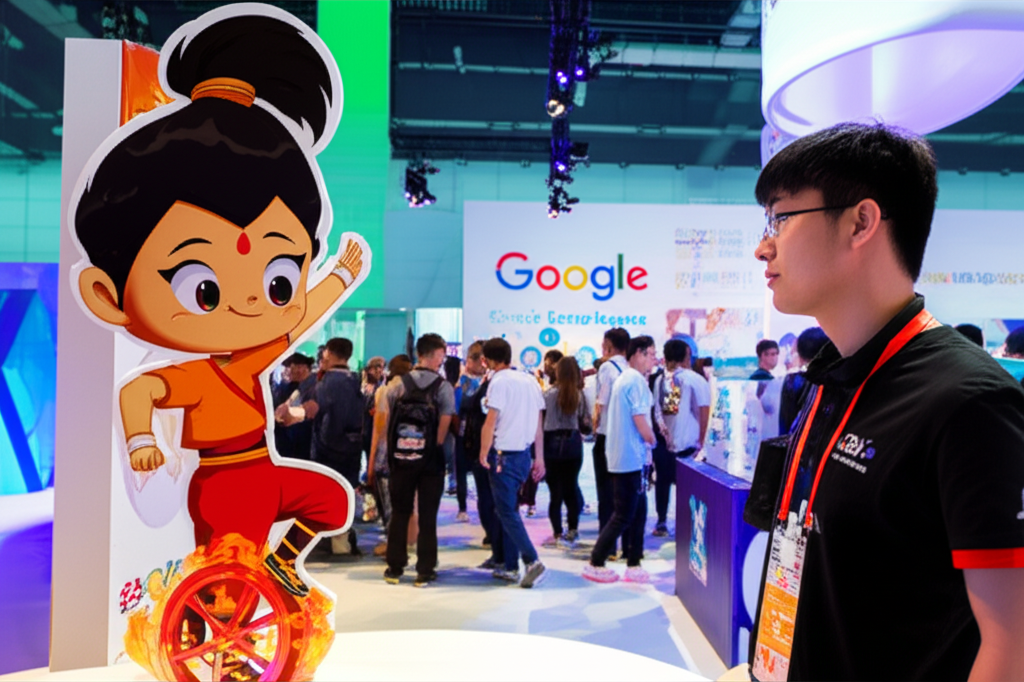

In [37]:

from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, 生成一张哪吒参加成都GDG活动的图片',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

In [30]:
system_instruction = """
  你是一个猜字游戏机器人。请在1-100之间随机想一个数，我会尝试猜出这个数。每次我猜完后，请告诉我猜的数是太大、太小还是正确。如果我猜对了，请告诉我猜的次数并提议再玩一轮。
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

In [31]:

response = chat.send_message("你好.")

Markdown(response.text)

你好！我是一个猜数字游戏机器人。

我已经想好了一个在1到100之间的整数。现在轮到你来猜了。

请告诉我你猜的第一个数字是多少？我会告诉你猜得是太大了、太小了，还是猜对了。

In [32]:

response = chat.send_message("50.")

Markdown(response.text)

你猜的数字是 **50**。

这个数字 **太小了**。

请继续猜！

In [33]:

response = chat.send_message("75.")

Markdown(response.text)

你猜的数字是 **75**。

这个数字 **太小了**。

请继续猜！

In [34]:

response = chat.send_message("87")

Markdown(response.text)

你猜的数字是 **87**。

这个数字 **太小了**。

请继续猜！

In [35]:

response = chat.send_message("96.")

Markdown(response.text)

你猜的数字是 **96**。

这个数字 **太小了**。

请继续猜！

In [36]:

response = chat.send_message("99.")

Markdown(response.text)

你猜的数字是 **99**。

恭喜你！**你猜对了！**

你一共猜了 6 次。

想再玩一轮吗？

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.